### 벡터 공간과 부분 공간

머신러닝에 활용되는 모든 특징점들은 벡터 공간에 표시된다.

In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# 데이터 불러오기
iris = load_iris()
X = iris.data[:, :3]  # 3개의 feature 사용
y = iris.target
target_names = iris.target_names

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['labels'] = [iris.target_names[t] for t in iris.target]
df = df.drop(columns='petal width (cm)')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),labels
0,5.1,3.5,1.4,setosa
1,4.9,3.0,1.4,setosa
2,4.7,3.2,1.3,setosa
3,4.6,3.1,1.5,setosa
4,5.0,3.6,1.4,setosa


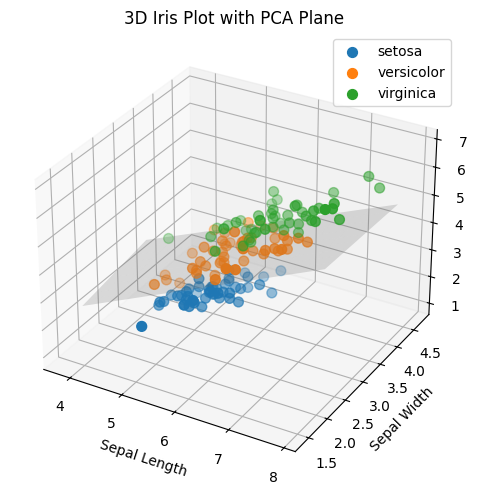

In [4]:
# PCA 수행 (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA 주성분을 원래 3D 공간으로 확장하여 평면 정의
# PCA.components_는 2x3 (2개의 성분, 원래 3차원 공간)
origin = np.mean(X, axis=0)  # PCA 평면의 중심을 원래 데이터 평균으로 설정
plane_points = np.array([origin,
                         origin + pca.components_[0],
                         origin + pca.components_[1]])

# 평면을 구성할 수 있도록 세 점으로부터 mesh 생성
v1 = pca.components_[0]
v2 = pca.components_[1]
plane_x, plane_y = np.meshgrid(np.linspace(-2, 2, 10), np.linspace(-2, 2, 10))
plane_z = origin[2] + v1[2]*plane_x + v2[2]*plane_y  # z = origin_z + 조합

# 시각화
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# 데이터 점
for target in np.unique(y):
    ax.scatter(X[y == target, 0], X[y == target, 1], X[y == target, 2],
               label=target_names[target], s=50)

# PCA 평면
ax.plot_surface(origin[0] + v1[0]*plane_x + v2[0]*plane_y,
                origin[1] + v1[1]*plane_x + v2[1]*plane_y,
                plane_z,
                alpha=0.2, color='gray')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Iris Plot with PCA Plane')
ax.legend()
plt.tight_layout()
plt.show()

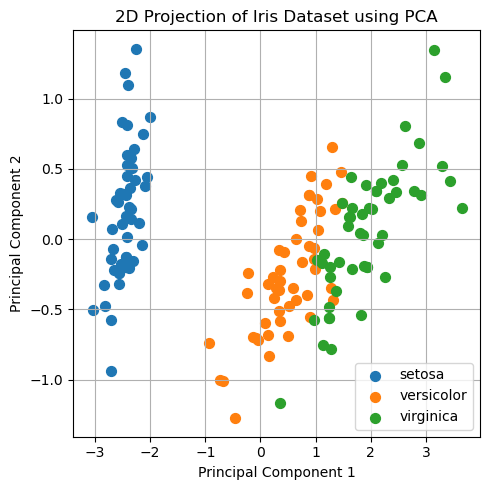

In [13]:
# 2D 평면에서 시각화 (PCA 결과)
plt.figure(figsize=(5, 5))
for target in np.unique(y):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1],
                label=target_names[target], s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Iris Dataset using PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

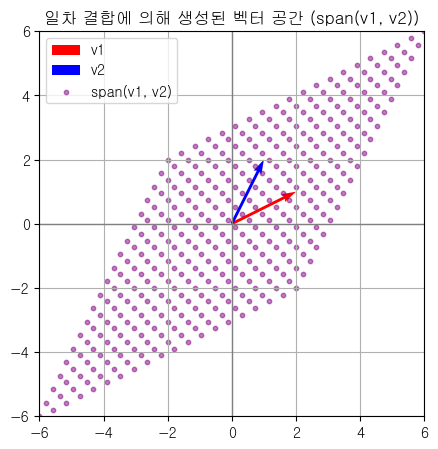

In [14]:
# 재실행: 필요한 라이브러리 임포트 및 시각화 코드 다시 실행
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\NGULIM.TTF'
font = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font)

# 두 개의 벡터 정의
v1 = np.array([2, 1])
v2 = np.array([1, 2])

# 일차결합 벡터들 생성 (스팬 공간 시각화)
coeffs = np.linspace(-2, 2, 20)
points = []

for a in coeffs:
    for b in coeffs:
        points.append(a * v1 + b * v2)
points = np.array(points)

# 플로팅
plt.figure(figsize=(5, 5))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')
plt.scatter(points[:, 0], points[:, 1], alpha=0.5, s=10, color='purple', label='span(v1, v2)')
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.gca().set_aspect('equal')
plt.legend()
plt.title('일차 결합에 의해 생성된 벡터 공간 (span(v1, v2))')
plt.grid(True)
plt.show()

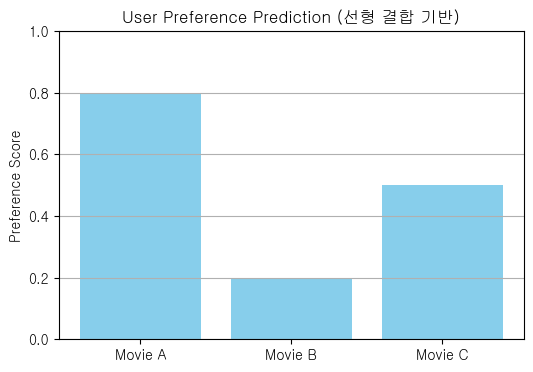

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 가상의 아이템 벡터 (장르별 선호도, 예: [액션, 코미디])
item_vectors = {
    'Movie A': np.array([1, 0]),  # 액션 100%, 코미디 0%
    'Movie B': np.array([0, 1]),  # 액션 0%, 코미디 100%
    'Movie C': np.array([0.5, 0.5])  # 액션 50%, 코미디 50%
}

# 유저의 취향 벡터 (장르별 선호도)
user_pref = np.array([0.8, 0.2])  # 액션을 더 좋아함

# 각 영화에 대한 선호도 예측 = 내적 (선형결합)
scores = {title: np.dot(user_pref, vec) for title, vec in item_vectors.items()}

# 시각화
titles = list(scores.keys())
values = list(scores.values())

plt.figure(figsize=(6, 4))
plt.bar(titles, values, color='skyblue')
plt.title("User Preference Prediction (선형 결합 기반)")
plt.ylabel("Preference Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()

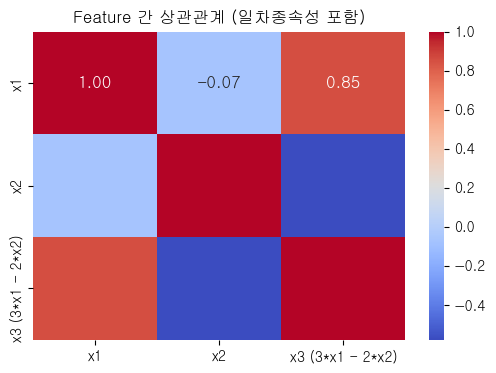

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 가상의 데이터프레임 (일차종속된 feature 포함)
np.random.seed(0)
n_samples = 100

# x1, x2는 독립적인 feature
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)

# x3는 x1과 x2의 선형결합 → 종속
x3 = 3 * x1 - 2 * x2

# 데이터프레임 생성
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3 (3*x1 - 2*x2)': x3
})

# 상관 행렬 계산 및 시각화
corr_matrix = df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title("Feature 간 상관관계 (일차종속성 포함)")
plt.show()

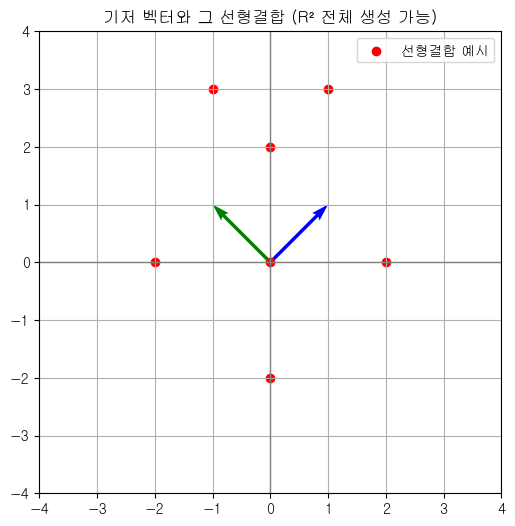

In [17]:
import matplotlib.pyplot as plt

# 2D 벡터 공간에서의 기저 벡터 2개
basis1 = np.array([1, 1])
basis2 = np.array([-1, 1])

# 화살표로 그릴 기준점
origin = np.array([[0, 0], [0, 0]])

# 여러 선형결합 예시를 만들어 그리기 위한 계수 조합
coeffs = [(-1, -1), (-1, 1), (0, 0), (1, -1), (1, 1), (2, 1), (1, 2)]

# 선형결합으로 만들어지는 점들
points = [a * basis1 + b * basis2 for a, b in coeffs]
points = np.array(points)

# 그림
plt.figure(figsize=(6, 6))
plt.quiver(*origin, [basis1[0], basis2[0]], [basis1[1], basis2[1]], angles='xy', scale_units='xy', scale=1, color=["blue", "green"])
plt.scatter(points[:, 0], points[:, 1], color='red', label='선형결합 예시')

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True)
plt.gca().set_aspect('equal')
plt.legend()
plt.title("기저 벡터와 그 선형결합 (R² 전체 생성 가능)")
plt.show()


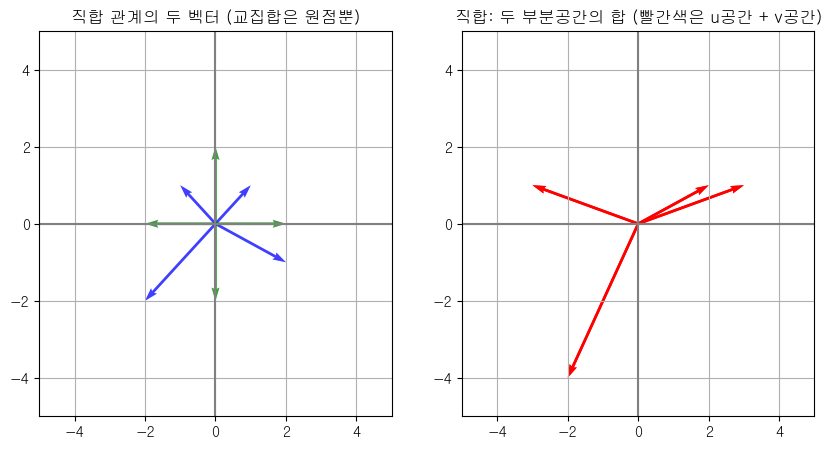

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 두 부분공간의 기저 벡터 (서로 직교하지 않지만 교집합이 0인 경우)
u1 = np.array([1, 0])
u2 = np.array([0, 1])

v1 = np.array([1, 1])
v2 = np.array([-1, 1])

# u와 v 공간 각각의 벡터 조합
u_vectors = [a * u1 + b * u2 for a, b in [(-2, -2), (-1, 1), (1, 1), (2, -1)]]
v_vectors = [a * v1 + b * v2 for a, b in [(-1, -1), (-1, 1), (1, -1), (1, 1)]]

# 전체 origin
origin = np.array([[0, 0], [0, 0]])

# 그림
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# u 공간 벡터들: 파란 점
ax[0].axhline(0, color='gray')
ax[0].axvline(0, color='gray')
ax[0].grid(True)

for vec in u_vectors:
    ax[0].quiver(*origin, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color="blue", alpha=0.5)

# v 공간 벡터들: 초록 점
for vec in v_vectors:
    ax[0].quiver(*origin, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color="green", alpha=0.5)

ax[1].axhline(0, color='gray')
ax[1].axvline(0, color='gray')
ax[1].grid(True)

# 직합 공간의 예시: u + v
combined_vectors = [u + v for u, v in zip(u_vectors, v_vectors)]
for vec in combined_vectors:
    ax[1].quiver(*origin, vec[0], vec[1], angles='xy', scale_units='xy', scale=1, color="red")

ax[0].set_xlim(-5, 5)
ax[0].set_ylim(-5, 5)
# ax[0].gca().set_aspect('equal')
ax[0].set_title("직합 관계의 두 벡터 (교집합은 원점뿐)")

ax[1].set_xlim(-5, 5)
ax[1].set_ylim(-5, 5)
# ax[1].gca().set_aspect('equal')
ax[1].set_title("직합: 두 부분공간의 합 (빨간색은 u공간 + v공간)")

plt.show()


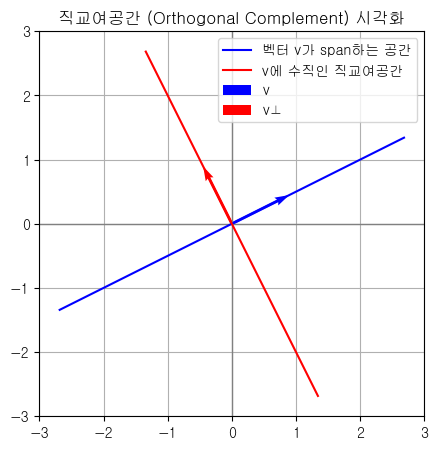

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 벡터 공간 R^2 상에서 예시 벡터
v = np.array([2, 1])

# v에 수직인 벡터를 계산 (직교여공간)
# 2x + 1y = 0 → 예: [-1, 2]
orthogonal = np.array([-1, 2])

# 방향 맞추기 (크기 보정은 생략)
v = v / np.linalg.norm(v)
orthogonal = orthogonal / np.linalg.norm(orthogonal)

# 선형 결합을 위해 벡터 좌표 계산
t = np.linspace(-3, 3, 20)
line1 = np.outer(t, v)  # 원래 벡터 방향
line2 = np.outer(t, orthogonal)  # 직교 벡터 방향

# 시각화
plt.figure(figsize=(5, 5))
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True)

# 벡터 공간
plt.plot(line1[:, 0], line1[:, 1], label='벡터 v가 span하는 공간', color='blue')
plt.plot(line2[:, 0], line2[:, 1], label='v에 수직인 직교여공간', color='red')

# 기준 벡터 표시
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color="blue", label='v')
plt.quiver(0, 0, orthogonal[0], orthogonal[1], angles='xy', scale_units='xy', scale=1, color="red", label='v⊥')

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect('equal')
plt.legend()
plt.title("직교여공간 (Orthogonal Complement) 시각화")
plt.show()


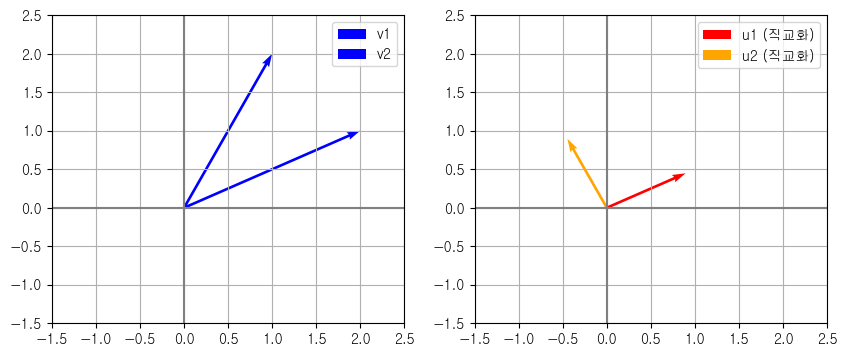

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 원래의 두 벡터 (선형독립)
v1 = np.array([2, 1])
v2 = np.array([1, 2])

# 그람-슈미트 직교화 과정
def gram_schmidt(vectors):
    ortho = []
    for v in vectors:
        for u in ortho:
            v = v - np.dot(v, u) / np.dot(u, u) * u
        ortho.append(v)
    return ortho

# 직교화된 벡터 구하기
orthogonal_vectors = gram_schmidt([v1, v2])
u1, u2 = orthogonal_vectors

# 정규화
u1 = u1 / np.linalg.norm(u1)
u2 = u2 / np.linalg.norm(u2)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1')
ax[0].quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v2')
ax[1].quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1, color='red', label='u1 (직교화)')
ax[1].quiver(0, 0, u2[0], u2[1], angles='xy', scale_units='xy', scale=1, color='orange', label='u2 (직교화)')

for i in range(2):
    ax[i].axhline(0, color='gray')
    ax[i].axvline(0, color='gray')
    ax[i].set_xlim(-1.5, 2.5)
    ax[i].set_ylim(-1.5, 2.5)
    ax[i].grid(True)
    ax[i].legend()

plt.show()